   5   0   0   0   0   0   0
   0   4   0   0   0   0   0
   0   1   0   0   1   0   0
   0   0   0   3   0   0   0
   0   0   0   0   1   0   0
   0   0   0   0   0   2   0
   0   0   0   0   0   2   1
False Positives
 [0 1 0 0 1 2 0]
False Negetives
 [0 0 2 0 0 0 2]
True Positives
 [5 4 0 3 1 2 1]
True Negetives
 [15 15 18 17 18 16 17]
Sensitivity 
 [1.         1.         0.         1.         1.         1.
 0.33333333]
Specificity 
 [1.         0.9375     1.         1.         0.94736842 0.88888889
 1.        ]
Precision 
 [1.  0.8 nan 1.  0.5 0.5 1. ]
Recall 
 [1.         1.         0.         1.         1.         1.
 0.33333333]
Áccuracy 
[1.   0.95 0.9  1.   0.95 0.9  0.9 ]
FScore 
[1.         0.88888889        nan 1.         0.66666667 0.66666667
 0.5       ]


<ipython-input-3-69251604ba3e>:60: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)


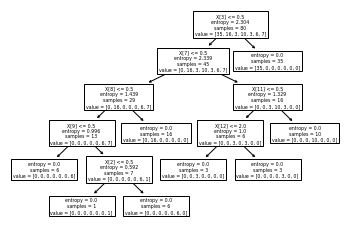

In [3]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree
 
###########################################################################################################
##########################################################################################################
"""
Import the Zoo Dataset
"""
#Import the dataset 
dataset = pd.read_csv('zoo_data.csv')
#We drop the animal names since this is not a good feature to split the data on
#dataset=dataset.drop('animal_name',axis=1)
###########################################################################################################
##########################################################################################################
"""
Split the data into a training and a testing set
"""
train_features = dataset.iloc[:80,:-1]
test_features = dataset.iloc[80:,:-1]
train_targets = dataset.iloc[:80,-1]
test_targets = dataset.iloc[80:,-1]
###########################################################################################################
##########################################################################################################
"""
Train the model
"""
tree1 = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)
export_graphviz(tree1, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
tree.plot_tree(tree1)
###########################################################################################################
##########################################################################################################
"""
Predict the classes of new, unseen data
"""
prediction = tree1.predict(test_features)
cm = confusion_matrix(test_targets, prediction)
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))
#confusionmatrix = np.matrix(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))
TPR = TP/(TP+FN)
print('Sensitivity \n {}'.format(TPR))
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Acc = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Acc))
Fscore = 2*((Precision*Recall)/(Precision+Recall))
print('FScore \n{}'.format(Fscore))
###########################################################################################################
##########################################################################################################
